In [2]:
import datetime
from collections import Counter, OrderedDict, defaultdict
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import torch
import torch.nn.functional as torch_F
from scipy.signal import savgol_filter
from datetime import datetime

In [271]:
df_counts_time = pd.read_csv('./data/4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')

lineages = torch.load('./data/Omicron_experimental_data_new.pkl')['lineages']
country = torch.load('./data/Omicron_experimental_data_new.pkl')['locations']

counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts']
counts = counts / (counts.sum(-1).unsqueeze(-1))

counts1 = counts.numpy()
counts = np.nan_to_num(counts1)

In [296]:
# 36start
forecast_result_1 = torch.load('./data/10phase_noAE_36_new.pkl', map_location=torch.device('cpu'))
forecast_result_2 = torch.load('./data/10phase_random_36_new.pkl', map_location=torch.device('cpu'))
forecast_result_3 = torch.load('./data/10phase_noSite_36_new.pkl', map_location=torch.device('cpu'))
forecast_result_4 = torch.load('./data/10phase_AE_36_reparam.pkl', map_location=torch.device('cpu'))

In [272]:
def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index

In [273]:
## get counts & forecast data
def get_counts(country_index, lineage_index):
    df_counts = pd.DataFrame(counts[:, country_index, lineage_index])
    return df_counts

def get_forecast(country_index, lineage_index, forecast):
    df_forecast = pd.DataFrame(forecast[:, country_index, lineage_index].squeeze(1))
    return df_forecast

## USA EG.5.1 growth

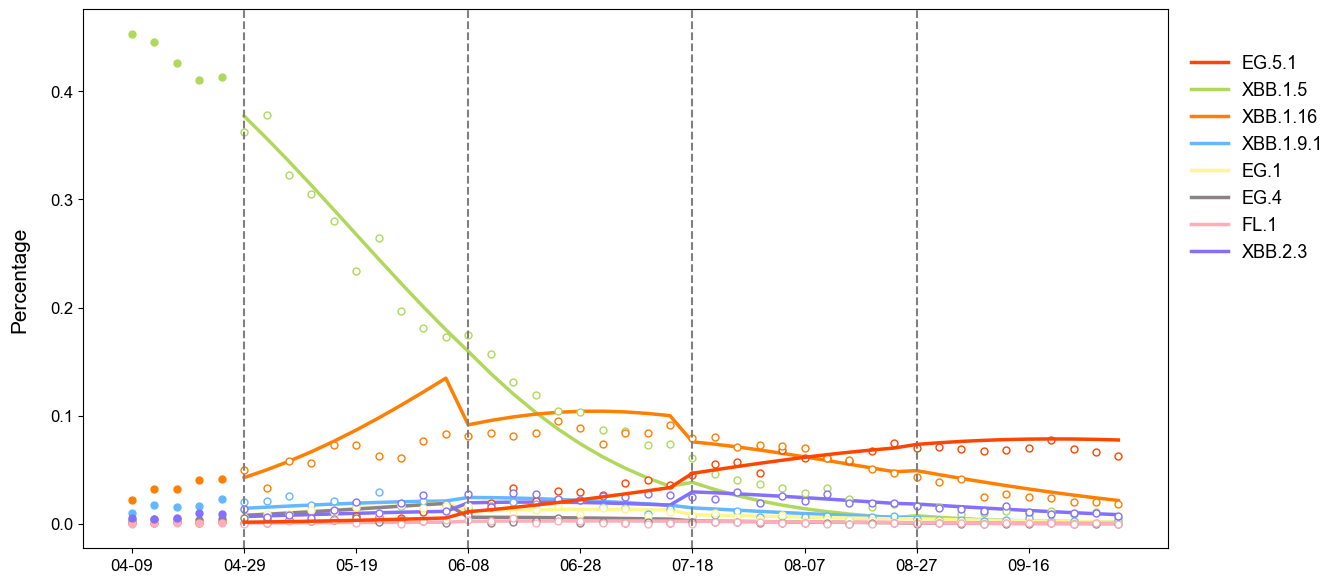

In [277]:
country_index = country.index('USA')
plt.rcParams['font.sans-serif'] = ['Arial']
# lineage = ['BA.1.1','BA.1.15','BA.2','BA.2.12.1', 'BA.5.1','BA.5.2.1', 'BQ.1.1','XBB.1.5']
# lineage = ['XBB.1.16', 'XBB.1.5', 'XBB.1.9.1', 'XBB', 'XBB.1', 'XBB.1.1', 'XBB.1.15', 'XBB.1.17.1', 'XBB.1.19.1', 'XBB.1.22']
# lineage = ['XBB.1.5', 'XBB', 'XBB.1', 'XBB.1.1', 'XBB.1.3', 'XBB.1.4', 'XBB.1.15', 'XBB.2', 'XBB.3', 'XBB.4']
lineage = ['EG.5.1', 'XBB.1.5', 'XBB.1.16', 'XBB.1.9.1', 'EG.1', 'EG.4', 'FL.1', 'XBB.2.3']
# lineage = ['BQ.1.1', 'BA.5.2.1', 'BF.7', 'BA.4.6', 'BA.5.1', 'BQ.1']
# lineage = ['XBB.1.16', 'XBB.1.5', 'XBB.1.9', 'FD.2', 'XBB.2.2', 'FL.4', 'FU.1']
# lineage = ['HK.3', 'EG.5.1', 'XBB.2.3.3', 'XBB.1.15.1', 'XBB.1.16.5']
# colors = cm.rainbow(np.arange(len(lineage))/len(lineage))
colors = ['#FF4500', '#b1d85c', '#FF7F00', '#63B8FF', '#FFF68F', '#8B8386', '#FFAEB9', '#8470FF']

m, n, s = 136,176,131

fig,ax1 = plt.subplots(figsize=(14,7))

def print_fig(choose):
    for i in range(len(lineage)):
        plt.plot(time[s:m], get_counts(country_index, get_lineage_index(lineage))[i][s:m], color = colors[i], lw=0, marker='o', markersize=5)
        plt.plot(time[m:n], get_counts(country_index, get_lineage_index(lineage))[i][m:n], color = colors[i], lw=0, marker='o', markersize=5, markerfacecolor='white')
        y_AE = get_forecast(country_index, get_lineage_index(lineage), forecast_result_4)[i][36:]
        y_noAE = get_forecast(country_index, get_lineage_index(lineage), forecast_result_1)[i][36:]
        y_random = get_forecast(country_index, get_lineage_index(lineage), forecast_result_2)[i][36:]
        y_noSite = get_forecast(country_index, get_lineage_index(lineage), forecast_result_3)[i][36:]
        if choose == 'smooth':
            if lineage[i] == 'EG.5.1':
                plt.plot(time[m:n], savgol_filter(y_AE, 5, 1)[m-36:n-36], color = colors[i], lw=2.5, zorder=5, label = lineage[i])
                # plt.plot(time[m:n], savgol_filter(y_noAE, 5, 1)[m-36:n-36], linestyle='--', color = colors[i], lw=2, zorder=-9)
                # plt.plot(time[m:n], savgol_filter(y_random, 5, 1)[m-36:n-36], linestyle='-.', color = colors[i], lw=2, zorder=-9)
                # plt.plot(time[m:n], savgol_filter(y_noSite, 5, 1)[m-36:n-36], linestyle=':', color = colors[i], lw=2, zorder=-9)

            else:
                plt.plot(time[m:n], savgol_filter(y_AE, 5, 1)[m-36:n-36], color = colors[i], lw=2.5, zorder=1, label = lineage[i])
                # plt.plot(time[m:n], savgol_filter(y_noAE, 5, 1)[m-36:n-36], linestyle='--', color = colors[i], lw=2, zorder=-9)
                # plt.plot(time[m:n], savgol_filter(y_random, 5, 1)[m-36:n-36], linestyle='-.', color = colors[i], lw=2, zorder=-9)
                # plt.plot(time[m:n], savgol_filter(y_noSite, 5, 1)[m-36:n-36], linestyle=':', color = colors[i], lw=2, zorder=-9)
        else:
            if lineage[i] == 'EG.5.1':
                plt.plot(time[m:n], y_AE[m-36:n-36], color = colors[i], lw=2.5, zorder=5, label = lineage[i])
            else:
                plt.plot(time[m:n], y_AE[m-36:n-36], color = colors[i], lw=2.5, zorder=1, label = lineage[i])
            # plt.plot(time[m:n], y_noAE[m-34:n-34], linestyle='--', color = colors[7+i], lw=2, zorder=-9)
            # plt.plot(time[m:n], y_random[m-34:n-34], linestyle='-.', color = colors[7+i], lw=2, zorder=-9)
            # plt.plot(time[m:n], y_noSite[m-34:n-34], linestyle=':', color = colors[7+i], lw=2, zorder=-9)
    
    datetime_plot = []
    string_plot = []
    for i in range(n - s):
        if i % 5 == 0:
            datetime_plot.append(time[i + s])
            string_plot.append(time[i + s].strftime('%m-%d'))
    
    plt.xticks(datetime_plot, string_plot)
    plt.ylabel('Percentage', fontsize = 15, labelpad = 15)
    ax1.yaxis.set_tick_params(labelsize=12)
    ax1.xaxis.set_tick_params(labelsize=12)
    plt.axvline(x=time[m],linestyle='--', color='grey')
    plt.axvline(x=time[m+10],linestyle='--', color='grey')
    plt.axvline(x=time[m+20],linestyle='--', color='grey')
    plt.axvline(x=time[m+30],linestyle='--', color='grey')
    # plt.axvline(x=time[],linestyle='--', color='grey')
    plt.legend(frameon=False, bbox_to_anchor=(1.15,0.93),borderaxespad = 0., fontsize=13)
    plt.show()

# print_fig('smooth')
print_fig('no_smooth')

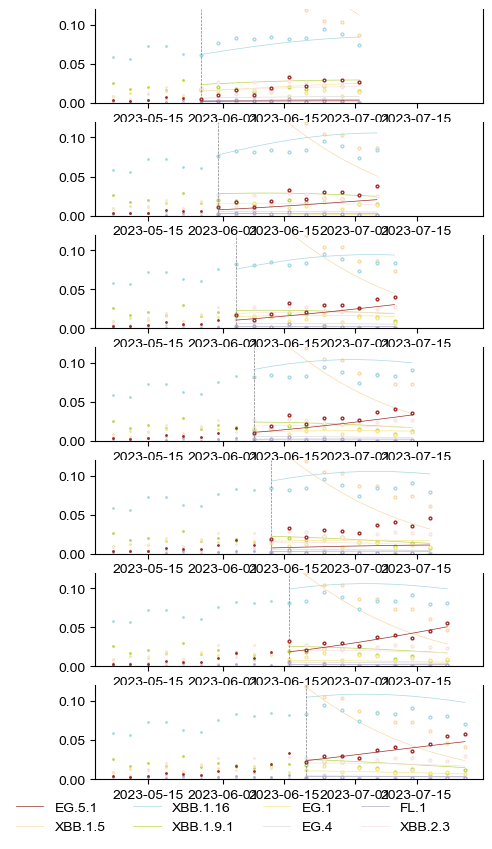

In [337]:
country_index1 = country.index('USA')
plt.figure(figsize=(5,10))
plt.rcParams['font.sans-serif'] = ['Arial']
lineage = ['EG.5.1', 'XBB.1.5', 'XBB.1.16', 'XBB.1.9.1', 'EG.1', 'EG.4', 'FL.1', 'XBB.2.3']
# colors = ['#FF4500', '#FFE4E1', '#ffc98a', '#fff4a5', '#bae7a1', '#bec6d5', '#925ef4', '#c6e1ff']
colors = ['#9a2d29', '#fadaab', '#a6d9e2', '#bbd64b', '#f8e68b', '#dcdcdc', '#b5accd', '#fbe2df']

for j in range(7):
    k = 33+j
    m= 143+j
    n=m+10
    s = 138
    end= 159
    plot=[]
    for i in range(end-n):
        plot.append(0)
    plt.subplot(7,1,j+1)
    for i in range(len(lineage)):
        if k == 33:
            forecast_result_4 = torch.load('./data/10phase_AE_reparam_43.pkl', map_location=torch.device('cpu'))
            if lineage[i] == 'EG.5.1':
                plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][i], color = colors[i], lw=0, zorder=1, marker='o', markersize=1)
                plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][i], color = colors[i], lw=0, zorder=1, marker='o', markersize=2, markerfacecolor='white')
                plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i], color = colors[i], lw=0.5, zorder=1, label = lineage[i])
            else:
                plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][i], color = colors[i], lw=0, zorder=-1, marker='o', markersize=1)
                plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][i], color = colors[i], lw=0, zorder=-1, marker='o', markersize=2, markerfacecolor='white')
                plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i], color = colors[i], lw=0.5, zorder=-1, label = lineage[i])
            plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=1)
        else:
            forecast_result_4 = torch.load('./data/10phase_AE_reparam_'+str(k)+'.pkl', map_location=torch.device('cpu'))
            if lineage[i] == 'EG.5.1':
                plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][i], color = colors[i], lw=0, zorder=1, marker='o', markersize=1)
                plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][i], color = colors[i], lw=0, zorder=1, marker='o', markersize=2, markerfacecolor='white')
                plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i], color = colors[i], lw=0.5, zorder=1, label = lineage[i])
            else:
                plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][i], color = colors[i], lw=0, zorder=-1, marker='o', markersize=1)
                plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][i], color = colors[i], lw=0, zorder=-1, marker='o', markersize=2, markerfacecolor='white')
                plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i], color = colors[i], lw=0.5, zorder=-1, label = lineage[i])
            plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=1)
    plt.axvline(x=time[m],linestyle='--', color='grey',lw=0.5)
    datetime_plot = []
    string_plot = []
    for i in range(n - m):
        if i % 10 == 0:
            datetime_plot.append(time[i + m])
            string_plot.append(time[i + m].strftime('%Y-%m-%d'))
    # plt.xticks(datetime_plot, string_plot, fontsize=9)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    plt.ylim(0,0.12)
    if j==6:
        plt.legend(frameon=False,bbox_to_anchor=(0.95,-0.1),ncol=4)

(0.0, 0.15)

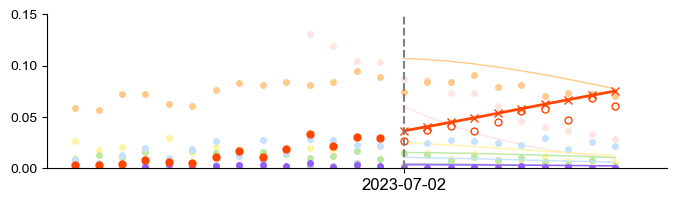

In [229]:
i=42
forecast_result_1 = torch.load('./data/10phase_noAE_new_'+str(i)+'.pkl', map_location=torch.device('cpu'))
forecast_result_2 = torch.load('./data/10phase_random_new_'+str(i)+'.pkl', map_location=torch.device('cpu'))
forecast_result_3 = torch.load('./data/10phase_noSite_new_'+str(i)+'.pkl', map_location=torch.device('cpu'))
forecast_result_4 = torch.load('./data/10phase_AE_reparam_'+str(i)+'.pkl', map_location=torch.device('cpu'))
country_index1 = country.index('USA')
plt.figure(figsize=(8,2))
plt.rcParams['font.sans-serif'] = ['Arial']
lineage = ['EG.5.1', 'XBB.1.5', 'XBB.1.16', 'XBB.1.9.1', 'EG.1', 'EG.4', 'FL.1', 'XBB.2.3']
colors = ['#FF4500', '#FFE4E1', '#ffc98a', '#fff4a5', '#bae7a1', '#bec6d5', '#925ef4', '#c6e1ff']
m= 152
n=m+10
s = 138
end= 163
plot=[]
for i in range(end-n):
    plot.append(0)
for i in range(len(lineage)):
    if lineage[i] == 'EG.5.1':
        plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][i], color = colors[i], lw=0, zorder=1, marker='o', markersize=5)
        plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][i], color = colors[i], lw=0, zorder=1, marker='o', markersize=5, markerfacecolor='white')
        plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i], color = colors[i], lw=2, zorder=1, label = lineage[i],marker='x')
    else:
        plt.plot(time[:counts.shape[0]][s:m], get_counts(country_index1, get_lineage_index(lineage))[s:m][i], color = colors[i], lw=0, zorder=-1, marker='o', markersize=4)
        plt.plot(time[:counts.shape[0]][m:n], get_counts(country_index1, get_lineage_index(lineage))[m:n][i], color = colors[i], lw=0, zorder=-1, marker='o', markersize=4)
        plt.plot(time[:counts.shape[0]][m:n], get_forecast(country_index1, get_lineage_index(lineage), forecast_result_4)[m:n][i], color = colors[i], lw=1, zorder=-1, label = lineage[i])
    plt.plot(time[:counts.shape[0]][n:end], plot, color = 'white', lw=0, marker='o', markersize=4)
# plt.ylabel('Percentage', fontsize=12) 
plt.axvline(x=time[m],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(n - m):
    if i % 10 == 0:
        datetime_plot.append(time[i + m])
        string_plot.append(time[i + m].strftime('%Y-%m-%d'))
plt.xticks(datetime_plot, string_plot, fontsize=12)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim(0,0.15)
# plt.legend(loc='upper left', frameon=False)

In [16]:
df = pd.DataFrame()
for i in range(len(lineage)):
    df[i] = get_forecast(country_index, get_lineage_index(lineage), forecast_result_4)[i][36:][m-36:n-36]

([<matplotlib.axis.YTick at 0x29f289c30>,
 [Text(0, 1, '8'),
  Text(0, 2, '7'),
  Text(0, 3, '6'),
  Text(0, 4, '5'),
  Text(0, 5, '4'),
  Text(0, 6, '3'),
  Text(0, 7, '2'),
  Text(0, 8, '1')])

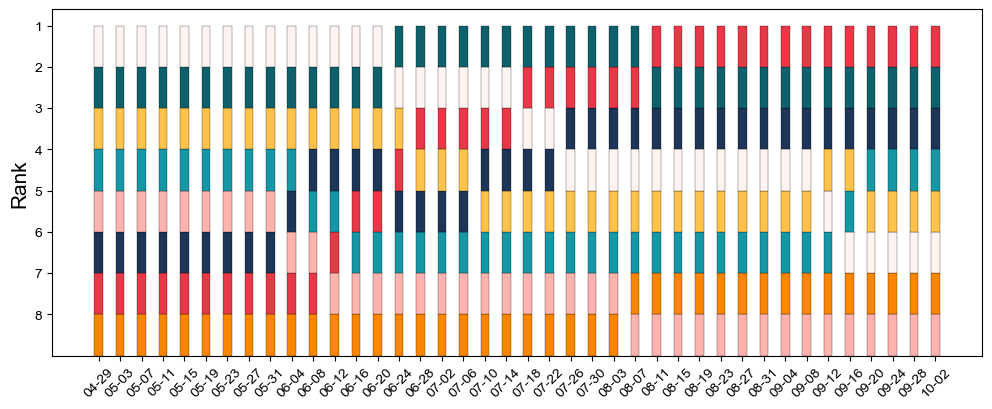

In [334]:
country_index = country.index('USA')
lineage = ['XBB.1.5', 'XBB.1.9.1', 'XBB.1.16', 'EG.5.1', 'EG.1', 'EG.4', 'FL.1', 'XBB.2.3']
m, n= 136, 176
df = pd.DataFrame(savgol_filter(pd.DataFrame(torch.tensor(np.array(get_forecast(country_index, get_lineage_index(lineage), forecast_result_4)[136:176])).T), 5, 1))
# df = pd.DataFrame(torch.tensor(np.array(get_forecast(country_index, get_lineage_index(lineage), forecast_result_4)[m:n])).T)
# df = pd.DataFrame(torch.tensor(np.array(get_counts(country_index, get_lineage_index(lineage))[m:n])).T)
df.index = lineage

df_rank = pd.DataFrame()
df_rank.index = lineage
for i in range(n-m):
    df_rank[time[m+i].strftime('%Y-%m-%d')] = ''
    for j in range(len(lineage)):
        lineage_index = df.sort_values(by=[i],ascending=[False]).index[j]
        df_rank[time[m+i].strftime('%Y-%m-%d')][lineage_index] = j+1

df_rank_plot = pd.DataFrame()
df_rank_plot.index = df_rank.columns
for i in range(len(df_rank.index)):
    df_rank_plot[str(len(lineage)-i)] = ''
    for j in df_rank.columns:
        df_rank_plot[str(len(lineage)-i)][j] = df_rank[df_rank[j] == i+1].index.tolist()[0]

prepare_list = locals()
for i in range(len(lineage)):
    prepare_list['color_list_' + str(i+1)] = []
    for j in range(len(df_rank_plot)):
        if df_rank_plot[str(i+1)][j] == 'EG.5.1':
            prepare_list['color_list_' + str(i+1)].append('#E73847')
        elif df_rank_plot[str(i+1)][j] == 'EG.4':
            prepare_list['color_list_' + str(i+1)].append('#FFB3AE')
        elif df_rank_plot[str(i+1)][j] == 'XBB.1.5':
            prepare_list['color_list_' + str(i+1)].append('#FFF4F2')
        elif df_rank_plot[str(i+1)][j] == 'XBB.1.9.1':
            prepare_list['color_list_' + str(i+1)].append('#FFC24B')
        elif df_rank_plot[str(i+1)][j] == 'FL.1':
            prepare_list['color_list_' + str(i+1)].append('#FA8600')
        elif df_rank_plot[str(i+1)][j] == 'EG.1':
            prepare_list['color_list_' + str(i+1)].append('#1597A5')
        elif df_rank_plot[str(i+1)][j] == 'XBB.1.16':
            prepare_list['color_list_' + str(i+1)].append('#0E606B')
        elif df_rank_plot[str(i+1)][j] == 'XBB.2.3':
            prepare_list['color_list_' + str(i+1)].append('#1D3557')

df_background = df_rank.copy(deep = True)
for i in df_background.columns:
    for j in range(len(lineage)):
        df_background[i][j] = 1

rank_list = []
for i in range(len(lineage)+1):
    rank_list.append(len(lineage)+1-i)

width = 0.4
b2 = df_background.loc['XBB.1.5']
b3 = b2 + df_background.loc['XBB.1.9.1']
b4 = b3 + df_background.loc['XBB.1.16']
b5 = b4 + df_background.loc['EG.5.1']
b6 = b5 + df_background.loc['EG.1']
b7 = b6 + df_background.loc['EG.4']
b8 = b7 + df_background.loc['FL.1']

plt.figure(figsize=(12,4.5))
plt.rcParams['font.sans-serif'] = ['Arial']
ind = np.arange(n-m)
p1 = plt.bar(ind, df_background.loc['XBB.1.5'], width, color=color_list_1, edgecolor = 'black', linewidth = 0.2)
p2 = plt.bar(ind, df_background.loc['XBB.1.9.1'], width, bottom=b2, color=color_list_2, edgecolor = 'black', linewidth = 0.2)
p3 = plt.bar(ind, df_background.loc['XBB.1.16'], width, bottom=b3, color=color_list_3, edgecolor = 'black', linewidth = 0.2)
p4 = plt.bar(ind, df_background.loc['EG.5.1'], width, bottom=b4, color=color_list_4, edgecolor = 'black', linewidth = 0.2)
p5 = plt.bar(ind, df_background.loc['EG.1'], width, bottom=b5, color=color_list_5, edgecolor = 'black', linewidth = 0.2)
p6 = plt.bar(ind, df_background.loc['EG.4'], width, bottom=b6, color=color_list_6, edgecolor = 'black', linewidth = 0.2)
p7 = plt.bar(ind, df_background.loc['FL.1'], width, bottom=b7, color=color_list_7, edgecolor = 'black', linewidth = 0.2)
p8 = plt.bar(ind, df_background.loc['XBB.2.3'], width, bottom=b8, color=color_list_8, edgecolor = 'black', linewidth = 0.2)

plt.ylabel('Rank', fontsize = 15)
datetime_plot = []
string_plot = []
for i in df_background.columns:
    datetime_plot.append(datetime.strptime(i, '%Y-%m-%d'))
for i in range(len(datetime_plot)):
    string_plot.append(datetime_plot[i].strftime('%m-%d'))
plt.xticks(ind, string_plot, rotation=45)
ind = np.arange(9)
plt.yticks(ind[1:], rank_list[1:])

In [335]:
lineage = ['EG.5.1', 'XBB.1.5', 'XBB.1.16', 'XBB.1.9.1', 'EG.1', 'EG.4', 'FL.1', 'XBB.2.3']
df = np.zeros((40,8))
for i in range(len(df_rank_plot)):
    for col in df_rank_plot.columns:
        for k in range(len(lineage)):
            if df_rank_plot[col][i] == lineage[k]:
                df[i,k] = col

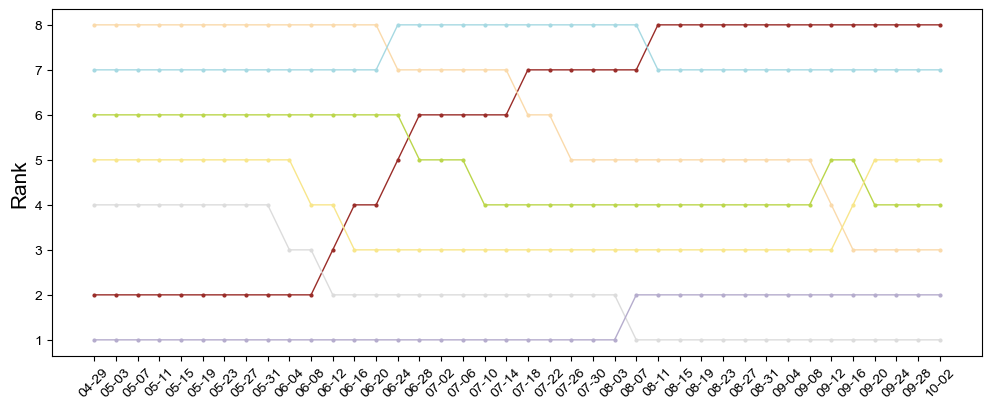

In [336]:
plt.figure(figsize=(12,4.5))
plt.rcParams['font.sans-serif'] = ['Arial']
colors = ['#9a2d29', '#fadaab', '#a6d9e2', '#bbd64b', '#f8e68b', '#dcdcdc', '#b5accd', '#fbe2df']
for i in range(7):
    plt.plot(df_background.keys(),pd.DataFrame(df)[i],c=colors[i],lw=1,marker='o',markersize=2)
datetime_plot = []
string_plot = []
for i in df_background.keys():
    datetime_plot.append(datetime.strptime(i, '%Y-%m-%d'))
for i in range(len(datetime_plot)):
    string_plot.append(datetime_plot[i].strftime('%m-%d'))
plt.xticks(df_background.keys(),string_plot,rotation=45)
plt.ylabel('Rank', fontsize = 15)

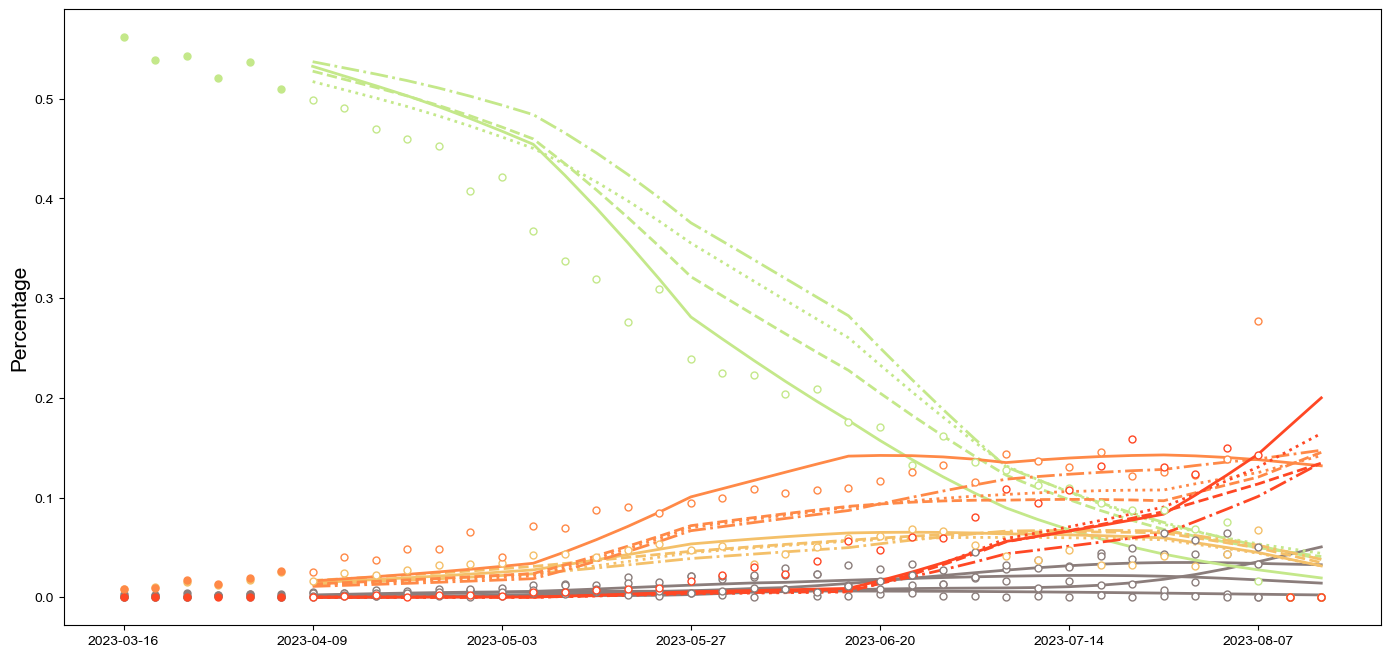

In [20]:
country_index = country.index('USA')

# lineage = ['BA.1.1','BA.1.15','BA.2','BA.2.12.1', 'BA.5.1','BA.5.2.1', 'BQ.1.1','XBB.1.5']
# lineage = ['XBB.1.16', 'XBB.1.5', 'XBB.1.9.1', 'XBB', 'XBB.1', 'XBB.1.1', 'XBB.1.15', 'XBB.1.17.1', 'XBB.1.19.1', 'XBB.1.22']
# lineage = ['XBB.1.5', 'XBB', 'XBB.1', 'XBB.1.1', 'XBB.1.3', 'XBB.1.4', 'XBB.1.15', 'XBB.2', 'XBB.3', 'XBB.4']
lineage = ['XBB.1.5', 'XBB.1.9.1', 'XBB.1.16', 'EG.5.1', 'EG.1', 'EG.4', 'FL.1', 'XBB.2.3.3']
# colors = cm.rainbow(np.arange(len(lineage))/len(lineage))

m, n, s = 131, 164, 125

plt.figure(figsize=(17,8))
plt.rcParams['font.sans-serif'] = ['Arial']

def print_fig(choose):
    for i in range(len(lineage)-4):
        plt.plot(time[s:m], get_counts(country_index, get_lineage_index(lineage))[i+4][s:m], color = '#8B7D7B', lw=0, marker='o', markersize=5)
        plt.plot(time[m:n], get_counts(country_index, get_lineage_index(lineage))[i+4][m:n], color = '#8B7D7B', lw=0, marker='o', markersize=5, markerfacecolor='white')
        y_else = get_forecast(country_index, get_lineage_index(lineage), forecast_result_3)[i+4][34:]
        if choose == 'smooth':
            plt.plot(time[m:n], savgol_filter(y_else, 50, 10)[m-34:n-34], color = '#8B7D7B', lw=2, zorder=-9, label = lineage[i+4])
            # plt.plot(time[m:n], get_forecast(country_index, get_lineage_index(lineage), forecast_result_1)[i+2][34:][m-34:n-34], linestyle='--', color = colors[i], lw=2, zorder=-9)
            # plt.plot(time[m:n], get_forecast(country_index, get_lineage_index(lineage), forecast_result_2)[i+2][34:][m-34:n-34], linestyle='-.', color = colors[i], lw=2, zorder=-9)
            # plt.plot(time[m:n], get_forecast(country_index, get_lineage_index(lineage), forecast_result_3)[i+2][34:][m-34:n-34], linestyle=':', color = colors[i], lw=2, zorder=-9)
        else:
            plt.plot(time[m:n], y_else[m-34:n-34], color = '#8B7D7B', lw=2, zorder=-9, label = lineage[i+4])
    
    for i in range(4):
        plt.plot(time[s:m], get_counts(country_index, get_lineage_index(lineage))[i][s:m], color = colors[7+i], lw=0, marker='o', markersize=5)
        plt.plot(time[m:n], get_counts(country_index, get_lineage_index(lineage))[i][m:n], color = colors[7+i], lw=0, marker='o', markersize=5, markerfacecolor='white')
        y_AE = get_forecast(country_index, get_lineage_index(lineage), forecast_result_4)[i][34:]
        y_noAE = get_forecast(country_index, get_lineage_index(lineage), forecast_result_1)[i][34:]
        y_random = get_forecast(country_index, get_lineage_index(lineage), forecast_result_2)[i][34:]
        y_noSite = get_forecast(country_index, get_lineage_index(lineage), forecast_result_3)[i][34:]
        if choose == 'smooth':
            plt.plot(time[m:n], savgol_filter(y_AE[m-34:n-34], 5, 1), color = colors[7+i], lw=2, zorder=-9, label = lineage[i])
            plt.plot(time[m:n], savgol_filter(y_noAE[m-34:n-34], 5, 1), linestyle='--', color = colors[7+i], lw=2, zorder=-9)
            plt.plot(time[m:n], savgol_filter(y_random[m-34:n-34], 5, 1), linestyle='-.', color = colors[7+i], lw=2, zorder=-9)
            plt.plot(time[m:n], savgol_filter(y_noSite[m-34:n-34], 5, 1), linestyle=':', color = colors[7+i], lw=2, zorder=-9)
        else:
            plt.plot(time[m:n], y_AE[m-34:n-34], color = colors[7+i], lw=2, zorder=-9, label = lineage[i])
            # plt.plot(time[m:n], y_noAE[m-34:n-34], linestyle='--', color = colors[7+i], lw=2, zorder=-9)
            # plt.plot(time[m:n], y_random[m-34:n-34], linestyle='-.', color = colors[7+i], lw=2, zorder=-9)
            # plt.plot(time[m:n], y_noSite[m-34:n-34], linestyle=':', color = colors[7+i], lw=2, zorder=-9)
    
    datetime_plot = []
    string_plot = []
    for i in range(n - s):
        if i % 6 == 0:
            datetime_plot.append(time[i + s])
            string_plot.append(time[i + s].strftime('%Y-%m-%d'))
    plt.ylabel('Percentage', fontsize = 15)
    plt.xticks(datetime_plot, string_plot)
    # plt.legend(frameon=False, bbox_to_anchor=(1.15,1.0),borderaxespad = 0.)
    plt.show()

print_fig('smooth')

# print_fig('no_smooth')